In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import requests

## Donwloading the data from the server

In [14]:
from urllib.request import urlretrieve
file_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
file_name= "insurance.csv"

urlretrieve(file_url,file_name)

print(f'Downloaded file as {file_name}')

Downloaded file as insurance.csv


## Task 1 : Import the dataset

In [16]:
df=pd.read_csv("insurance.csv")
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


## Add the headers to the dataframe, as mentioned in the project scenario.

In [17]:
header=['age', 'gender', 'bmi','no_of_children','smoker','region','charges']
df.columns=header

In [18]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


## Rreplace the '?' entries with 'NaN' values.

In [22]:
df.replace('?',np.nan, inplace=True)

In [23]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


## Task 2 : Data Wrangling

#### Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


#### age and smoker have missing data since they non-null values cannot reach the total entries of 2771.

### Handle missing data:

#### For continuous attributes (e.g., age), replace missing values with the mean.
#### For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
#### Update the data types of the respective columns.
#### Verify the update using df.info().

In [25]:
# Let's check the data type of age
df['age']

0       18
1       28
2       33
3       32
4       31
        ..
2766    47
2767    21
2768    19
2769    23
2770    54
Name: age, Length: 2771, dtype: object

In [29]:
# since dtype of age is object, let's change it to float to calculat the mean
df['age']=df['age'].astype('float')

In [32]:
# Let's get the mean of age
mean_age=df['age'].mean(axis=0)
mean_age

np.float64(39.11709432598482)

In [33]:
# Let's replace the NaN values with the mean above
df['age'].replace(np.nan,mean_age, inplace=True)

In [34]:
# Let's confirm if the age column is corrected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   float64
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 151.7+ KB


In [38]:
# Let's work on smoker. We will calculate the modal value in smoker whether it is the yes or no.
smoker_modal=df['smoker'].value_counts().idxmax()
smoker_modal

'0'

In [39]:
df['smoker'].replace(np.nan,smoker_modal, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12748\730538116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan,smoker_modal, inplace=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   float64
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 151.7+ KB


In [43]:
# Charges column has 4 decimal places
df['charges']

0        1725.55230
1        4449.46200
2       21984.47061
3        3866.85520
4        3756.62160
           ...     
2766     8569.86180
2767     2020.17700
2768    16450.89470
2769    21595.38229
2770     9850.43200
Name: charges, Length: 2771, dtype: float64

#### Update the charges column such that all values are rounded to nearest 2 decimal places.

In [44]:
df[['charges']]=np.round(df[['charges']],2)

In [45]:
df['charges']

0        1725.55
1        4449.46
2       21984.47
3        3866.86
4        3756.62
          ...   
2766     8569.86
2767     2020.18
2768    16450.89
2769    21595.38
2770     9850.43
Name: charges, Length: 2771, dtype: float64

# Task 3 : Exploratory Data Analysis (EDA)

#### Implement the regression plot for charges with respect to bmi

(0.0, 66902.85800000001)

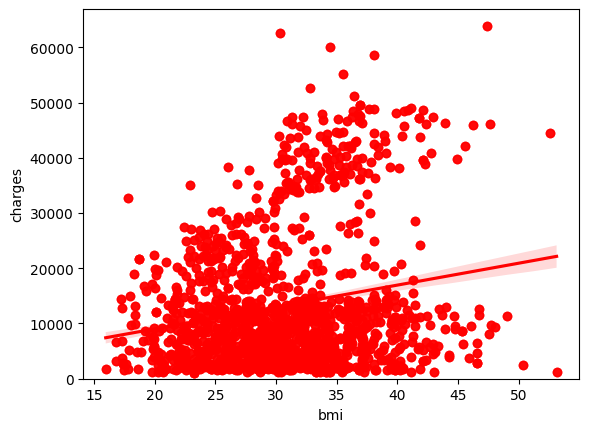

In [50]:
sns.regplot(x='bmi', y='charges',data=df, color='r')
plt.ylim(0)

#### Implement the box plot for charges with respect to smoker.

<Axes: xlabel='smoker', ylabel='charges'>

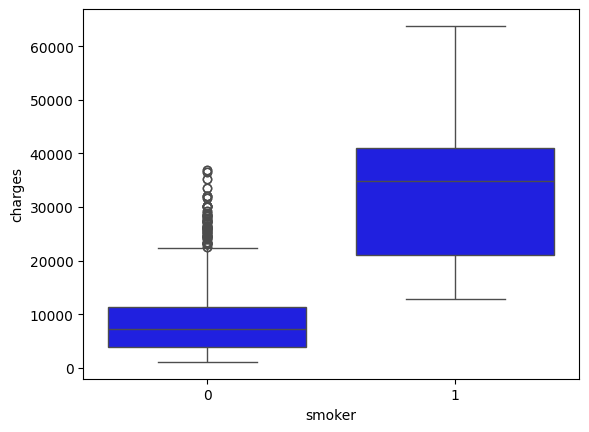

In [51]:
sns.boxplot(x='smoker', y='charges', data=df, color='b')

#### Print the correlation matrix for the dataset.

In [52]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026578  0.112855        0.037137 -0.022289   
gender         -0.026578  1.000000  0.042766        0.015693  0.083125   
bmi             0.112855  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037137  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022289  0.083125  0.011824        0.007016  1.000000   
region         -0.006977  0.022360  0.271200       -0.025594  0.053839   
charges         0.298890  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006977  0.298890  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


In [53]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026578,0.112855,0.037137,-0.022289,-0.006977,0.298890
gender,-0.026578,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112855,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037137,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022289,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006977,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298890,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Task 4 : Model Development

#### Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the 
 score of this model.

In [55]:
# First Install LinearRegression
from sklearn.linear_model import LinearRegression

In [57]:
lm=LinearRegression()
lm

LinearRegression()

In [58]:
X= df[['smoker']]
Y = df['charges']

In [59]:
lm.fit(X,Y)

LinearRegression()

In [61]:
print (lm.score(X,Y))

0.6227430402464125


#### Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the 
 #### score of this model. You should see an improvement in the performance.

In [63]:
df.columns

Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [62]:
lm1=LinearRegression()
lm1

LinearRegression()

In [64]:
Z=df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
Y = df['charges']

In [65]:
lm.fit(Z, Y)

LinearRegression()

In [67]:
print (lm.score(Z,Y))

0.7505867314418195


#### Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [74]:
# Import the Libraries required
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# We will use the Z and Y values created above
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(input)


In [72]:
Z=Z.astype(float)
pipe.fit(Z,Y)



Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [75]:
ypipe=pipe.predict(Z)
r2_score(Y,ypipe)


0.8453700268104134

# Task 5 : Model Refinement

In [81]:
#### import libraries requirement

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import Ridge

#### Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [78]:
# we will Z and Y values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

#### Initialize a Ridge regressor that used hyperparameter 
#### Fit the model using training data data subset. Print the 
#### score for the testing data.

In [82]:
# we will the same values as in previou cell
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
r2_score(y_test, yhat)


0.7254194018864448

#### Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the score for the testing subset.

In [83]:
# we will same values in previous cell
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)



In [84]:
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
r2_score(y_test,y_hat)

0.8208407204311381